In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('world_happiness.csv')
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
sns.set_theme(style="whitegrid")

C:\Users\theim\AppData\Local\Temp\ipykernel_3368\3318751264.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='happiness_score', y='country', data=top10, palette='viridis')


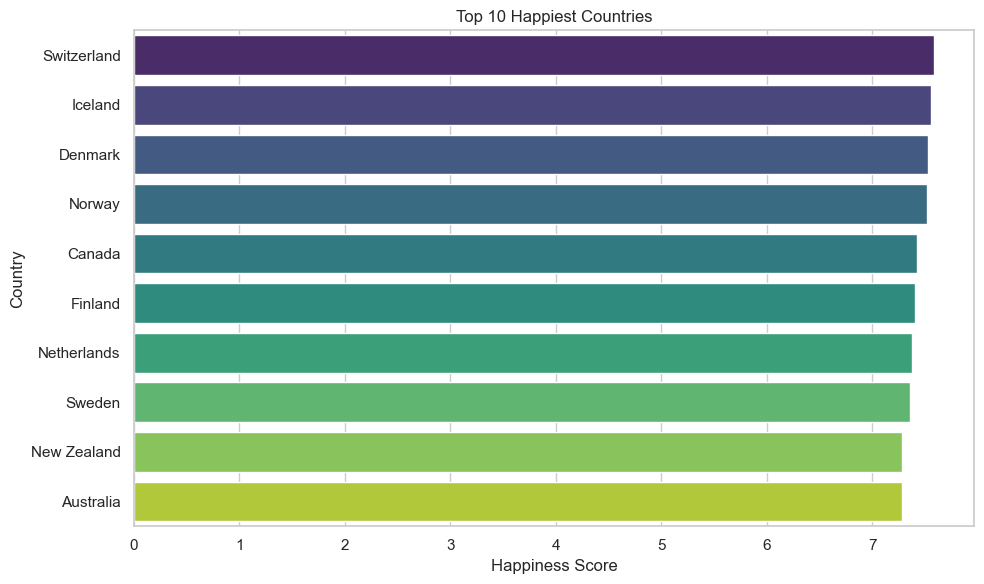

In [6]:
# Sort and get top 10
top10 = df.sort_values(by='happiness_score', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='happiness_score', y='country', data=top10, palette='viridis')
plt.title('Top 10 Happiest Countries')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


C:\Users\theim\AppData\Local\Temp\ipykernel_3368\3891806427.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='happiness_score', y='country', data=bottom10, palette='rocket')


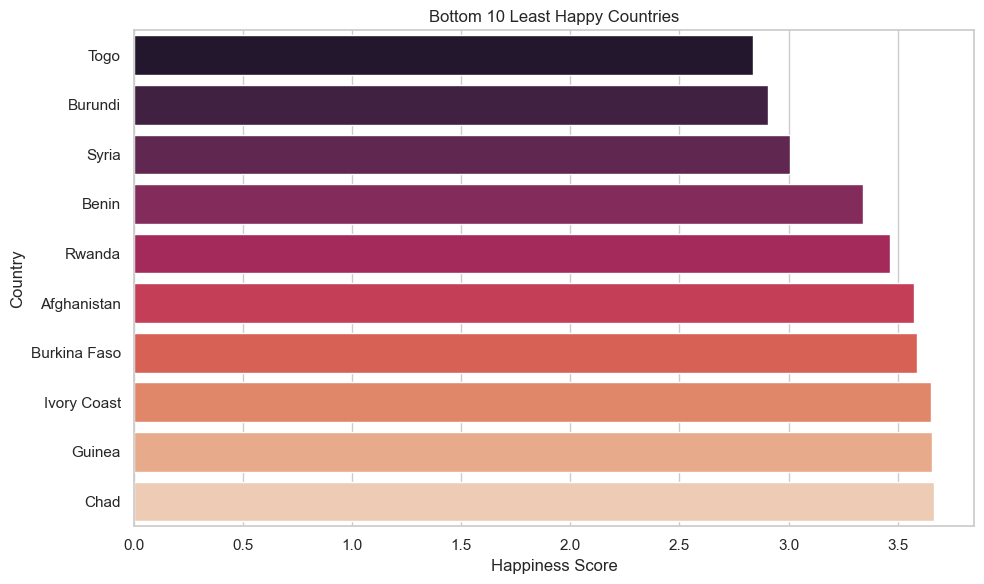

In [8]:
bottom10 = df.sort_values(by='happiness_score').head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='happiness_score', y='country', data=bottom10, palette='rocket')
plt.title('Bottom 10 Least Happy Countries')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


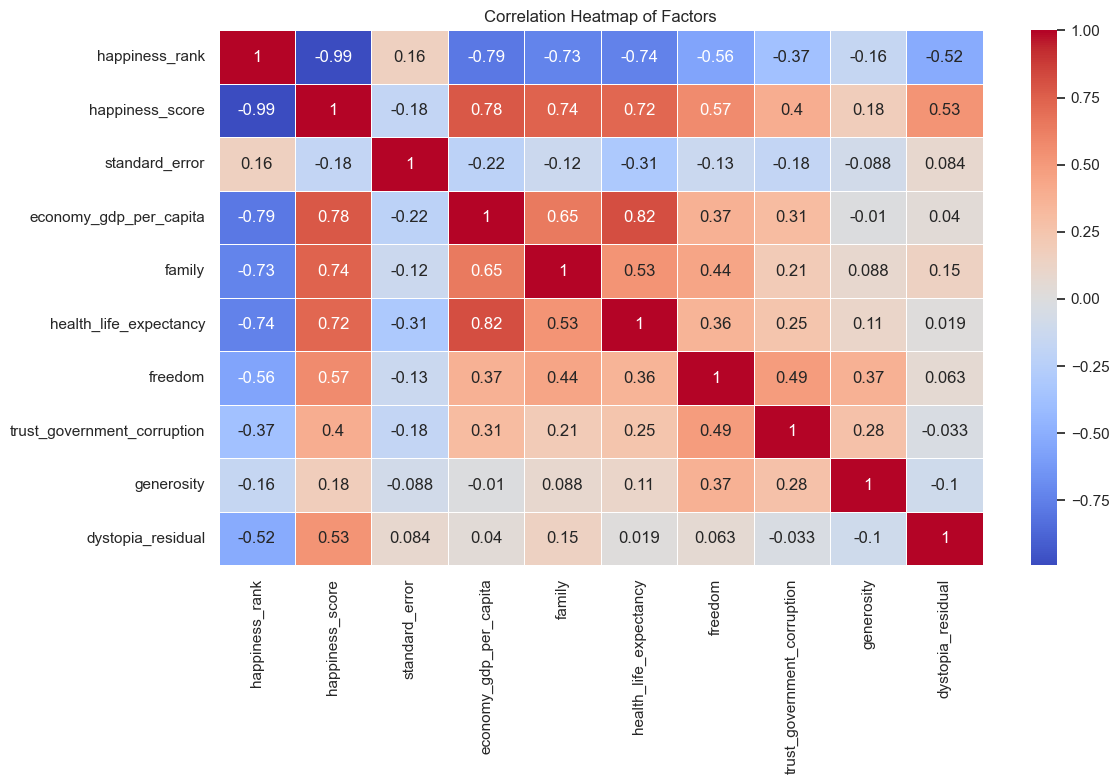

In [10]:
plt.figure(figsize=(12, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Factors')
plt.tight_layout()
plt.show()



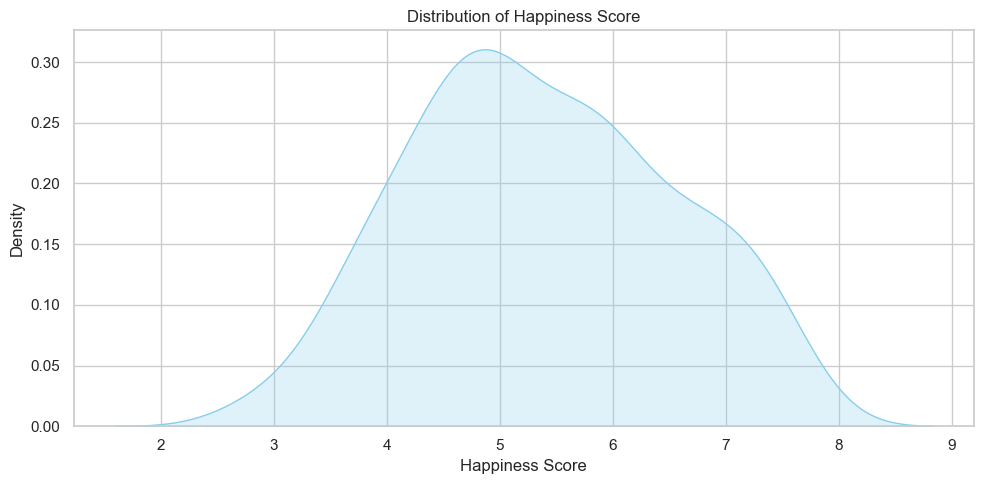

In [12]:
plt.figure(figsize=(10, 5))
sns.kdeplot(df['happiness_score'], fill=True, color='skyblue')
plt.title('Distribution of Happiness Score')
plt.xlabel('Happiness Score')
plt.ylabel('Density')
plt.tight_layout()
plt.show()


C:\Users\theim\AppData\Local\Temp\ipykernel_3368\1015982966.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_avg.values, y=region_avg.index, palette='crest')


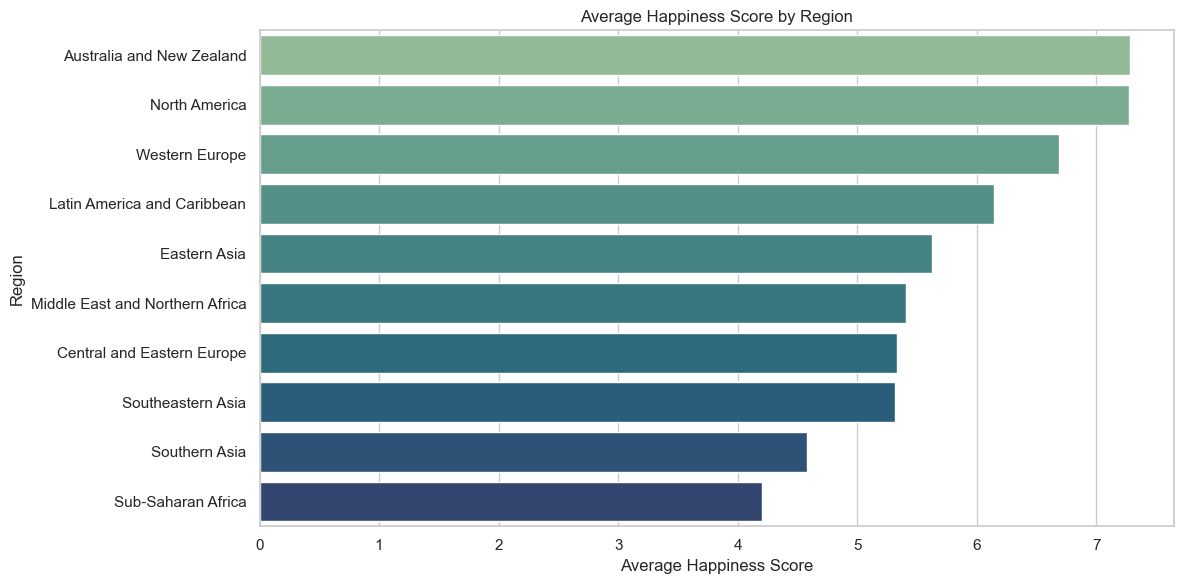

In [14]:
# Average happiness by region
region_avg = df.groupby('region')['happiness_score'].mean().sort_values(ascending=False)

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=region_avg.values, y=region_avg.index, palette='crest')
plt.title('Average Happiness Score by Region')
plt.xlabel('Average Happiness Score')
plt.ylabel('Region')
plt.tight_layout()
plt.show()


In [16]:
!pip install plotly


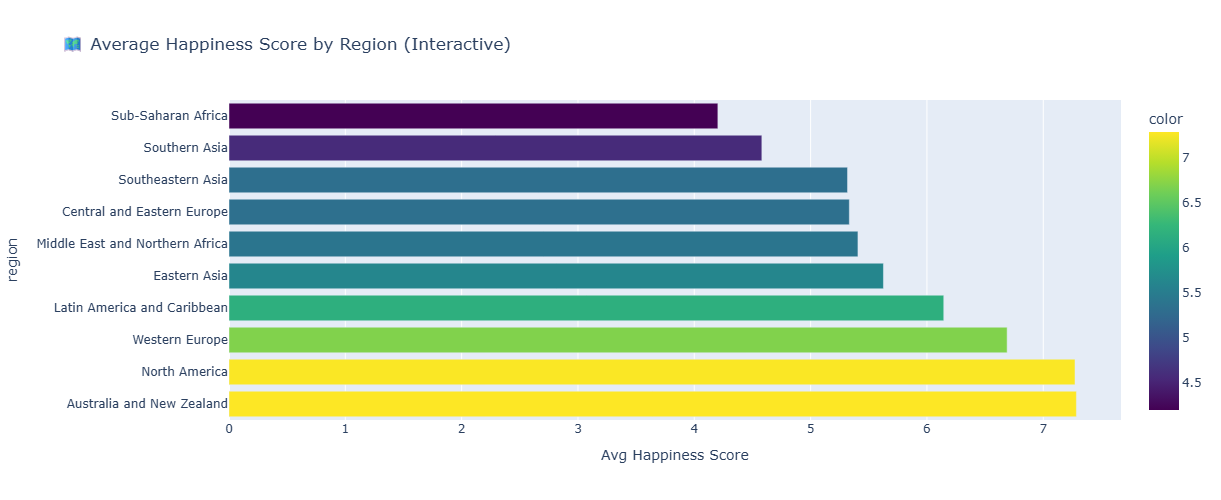

In [20]:
import plotly.express as px

# Reuse region_avg from earlier
fig = px.bar(
    region_avg,
    x=region_avg.values,
    y=region_avg.index,
    orientation='h',
    color=region_avg.values,
    color_continuous_scale='Viridis',
    labels={'y': 'Region', 'x': 'Avg Happiness Score'},
    title='🗺️ Average Happiness Score by Region (Interactive)'
)

fig.update_layout(height=500)
fig.show()


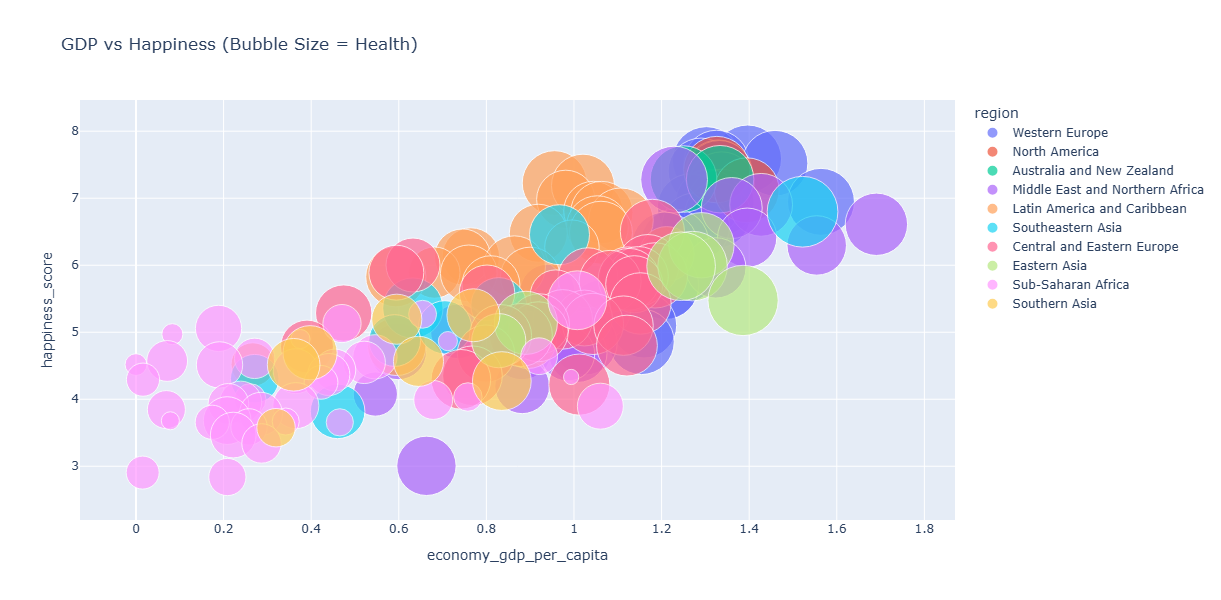

In [22]:
fig = px.scatter(
    df,
    x='economy_gdp_per_capita',
    y='happiness_score',
    color='region',
    size='health_life_expectancy',
    hover_name='country',
    title='GDP vs Happiness (Bubble Size = Health)',
    size_max=50
)
fig.update_layout(height=600)
fig.show()
